In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csc_matrix

pd.set_option('display.max_colwidth', None)


import warnings
warnings.filterwarnings('ignore')

## Import de dados

In [2]:
# Importe do dataset
df_animes = pd.read_csv('anime.csv')

df_rating = pd.read_csv('rating_complete.csv')

df_sinopse = pd.read_csv('anime_with_synopsis.csv')

## Descrição dos datasets

- df_animes: descrição dos animes de forma geral, tabela que contém score, nome, gênero, dentre outras informações gerais;

- df_rating: tabela que contém a relação das notas atribuidas por cada usuário;

- df_sinopse: tabela que contém a relação de cada anime com sua respectiva sinopse.

## Análise Exploratória de Dados (EDA)

In [3]:
# Primeiro contato com o dataset, visualizando o conteúdo e como estão distribuidas as features
df_animes.head(2)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0


In [4]:
# Features
df_animes.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

In [5]:
# Verificando o tipo das features
df_animes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [6]:
# Renomeando as features e transformando tudo em minúsculo para facilitar a utilização
df_animes.rename(columns = {'MAL_ID':'anime_id'}, inplace=True)
df_animes.rename(columns = str.lower, inplace = True)
columns = ['anime_id','name','premiered', 'score','genres','type', 'episodes', 'studios','source','rating','popularity',\
          'members','completed','on-hold','dropped']
df_animes = df_animes[columns]

# Reparando a feature premiered em season e year e posteriormente dropando ela
df_animes[['season','year']] = df_animes['premiered'].str.split(' ', n=1, expand=True) \
                                .rename(columns={0:'season',1:'year'})
df_animes.drop('premiered', axis=1, inplace=True)

# Transformando a coluna year em int
df_animes['year'] = pd.to_numeric(df_animes['year'])

# Ajustando o nome da coluna que identica o anime pelo ID no dataset que contém as sinopses
df_sinopse = df_sinopse.rename(columns = {'MAL_ID':'anime_id'})

In [7]:
# Quantidade de nulos por feature
df_animes.isna().sum()

anime_id          0
name              0
score             0
genres            0
type              0
episodes          0
studios           0
source            0
rating            0
popularity        0
members           0
completed         0
on-hold           0
dropped           0
season            0
year          12817
dtype: int64

In [8]:
df_animes.head(2)

,anime_id,name,score,genres,type,episodes,studios,source,rating,popularity,members,completed,on-hold,dropped,season,year
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,Sunrise,Original,R - 17+ (violence & profanity),39,1251960,718161,71513,26678,Spring,1998.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,Bones,Original,R - 17+ (violence & profanity),518,273145,208333,1935,770,Unknown,NaN


In [9]:
# Verificando as estatísticas básicas das features numéricas
df_animes.describe()

,anime_id,popularity,members,completed,on-hold,dropped,year
count,17562.000000,17562.000000,1.756200e+04,1.756200e+04,17562.000000,17562.000000,4745.000000
mean,21477.192347,8763.452340,3.465854e+04,2.209557e+04,955.049653,1176.599533,2006.313593
std,14900.093170,5059.327278,1.252821e+05,9.100919e+04,4275.675096,4740.348653,12.898287
min,1.000000,0.000000,1.000000e+00,0.000000e+00,0.000000,0.000000,1961.000000
25%,5953.500000,4383.500000,3.360000e+02,1.110000e+02,6.000000,37.000000,2001.000000
50%,22820.000000,8762.500000,2.065000e+03,8.175000e+02,45.000000,77.000000,2010.000000
75%,35624.750000,13145.000000,1.322325e+04,6.478000e+03,291.750000,271.000000,2016.000000
max,48492.000000,17565.000000,2.589552e+06,2.182587e+06,187919.000000,174710.000000,2021.000000


In [10]:
# Verificndo a quantidade de produções por tipo, fonte, classificação etária, temporada e Ano de lançamento
for feature in ['type','source','rating','season','year']:
    display(pd.DataFrame(df_animes['anime_id'].groupby(df_animes[feature]).count().sort_values(ascending=False)) \
            .rename(columns={'anime_id':'quantidade'}))

,quantidade
type,
TV,4996
OVA,3894
Movie,3041
Special,2218
ONA,1907
Music,1469
Unknown,37


,quantidade
source,
Original,5215
Manga,3825
Unknown,3567
Visual novel,993
Game,880
Light novel,768
Other,597
Novel,510
Music,317


,quantidade
rating,
PG-13 - Teens 13 or older,6132
G - All Ages,5782
PG - Children,1461
Rx - Hentai,1345
R - 17+ (violence & profanity),1157
R+ - Mild Nudity,997
Unknown,688


,quantidade
season,
Unknown,12817
Spring,1611
Fall,1389
Winter,942
Summer,803


,quantidade
year,
2017.0,266
2016.0,262
2018.0,257
2015.0,229
2014.0,227
...,...
1966.0,11
1963.0,5
1964.0,4


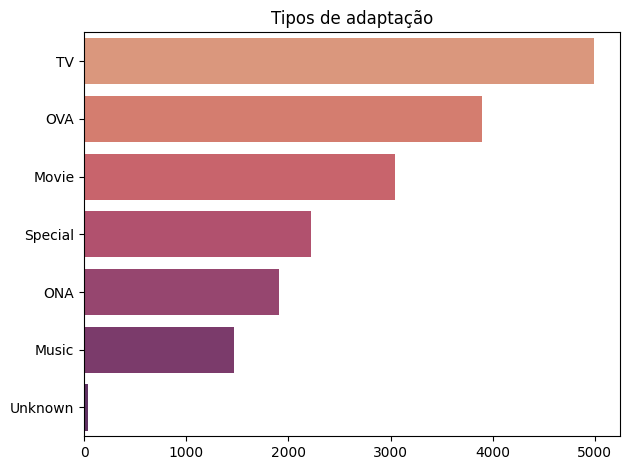

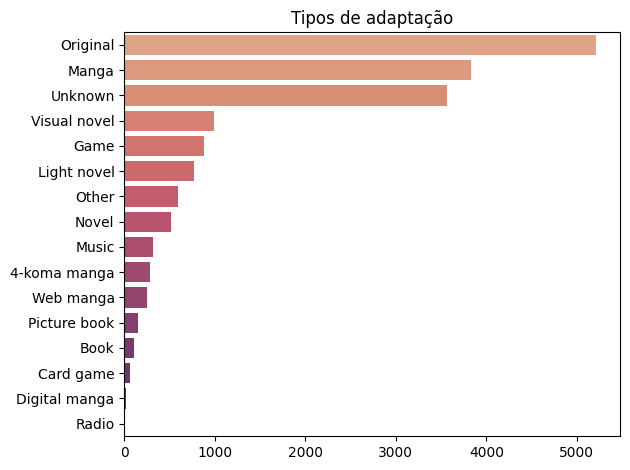

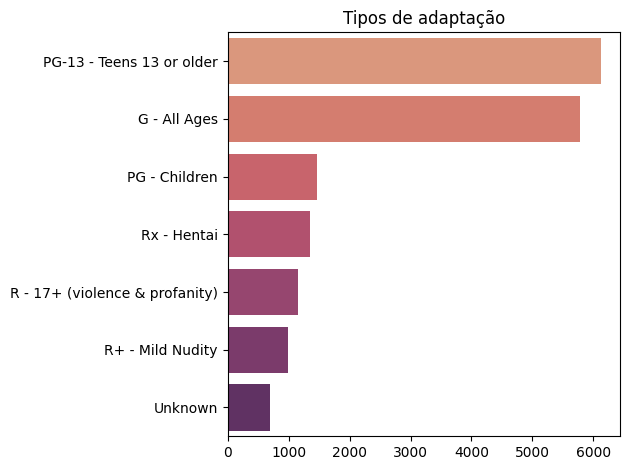

In [11]:
# Visualizando a quantidade de produções de acordo com os tipos, fontes e classificação etária 
for feature in ['type','source','rating']:
    anime_feature_count = df_animes[feature].value_counts()
    sns.barplot(x=anime_feature_count.values,
                y=anime_feature_count.index,
                palette='flare') \
                .set_title('Tipos de adaptação')
    plt.tight_layout()
    plt.show()

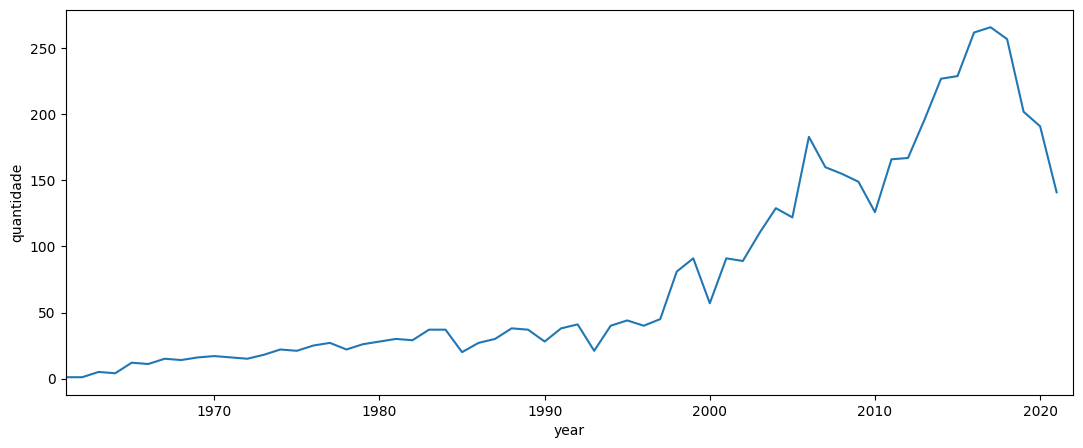

In [12]:
# Visualizando o crescimento da produção de animes
year = pd.DataFrame(df_animes['year'].groupby(df_animes['year']).count()).rename(columns={'year':'quantidade'})
sns.lineplot(data=year,
               x=year.index,
               y=year['quantidade']);

## Ajuste de tamanho do gráfico
plt.gcf().set_size_inches(13, 5);
plt.xlim(1961,2022);

In [13]:
# Os 10 animes mais bem avaliados, sendo necessário haver no mínimo 700.000 membros, foram considerados todos os
# tipos de produção

df_animes[['name','score','genres','type', 'episodes', 'studios','source','rating',\
          'members']].sort_values(by='score', ascending = False).query('members > (700000)').head(10)

,name,score,genres,type,episodes,studios,source,rating,members
3971,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Magic, Fantasy, Shounen",TV,64,Bones,Manga,R - 17+ (violence & profanity),2248456
15926,Shingeki no Kyojin: The Final Season,9.17,"Action, Military, Mystery, Super Power, Drama, Fantasy, Shounen",TV,16,MAPPA,Manga,R - 17+ (violence & profanity),733260
5683,Steins;Gate,9.11,"Thriller, Sci-Fi",TV,24,White Fox,Visual novel,PG-13 - Teens 13 or older,1771162
6474,Hunter x Hunter (2011),9.1,"Action, Adventure, Fantasy, Shounen, Super Power",TV,148,Madhouse,Manga,PG-13 - Teens 13 or older,1673924
14963,Shingeki no Kyojin Season 3 Part 2,9.1,"Action, Drama, Fantasy, Military, Mystery, Shounen, Super Power",TV,10,Wit Studio,Manga,R - 17+ (violence & profanity),1073626
9886,Koe no Katachi,9.0,"Drama, School, Shounen",Movie,1,Kyoto Animation,Manga,PG-13 - Teens 13 or older,1387607
833,Gintama,8.96,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,201,Sunrise,Manga,PG-13 - Teens 13 or older,754607
3537,Clannad: After Story,8.96,"Slice of Life, Comedy, Supernatural, Drama, Romance",TV,24,Kyoto Animation,Visual novel,PG-13 - Teens 13 or older,915885
11308,Kimi no Na wa.,8.96,"Romance, Supernatural, School, Drama",Movie,1,CoMix Wave Films,Original,PG-13 - Teens 13 or older,1726660
2656,Code Geass: Hangyaku no Lelouch R2,8.91,"Action, Military, Sci-Fi, Super Power, Drama, Mecha",TV,25,Sunrise,Original,R - 17+ (violence & profanity),1268320


## **KNN** - Recomendação de animes

In [14]:
# Filtrando os animes de acordo com a quantidade de membros de forma a eliminar os animes com poucos membros
animes_selecionados = df_animes[['anime_id', 'name']].loc[df_animes['members'] >= 150000]

In [15]:
df_rating_selecionados = animes_selecionados.merge(df_rating, on = 'anime_id')

In [16]:
user_rating_matrix = df_rating_selecionados.pivot(index = 'name', columns = 'user_id', values = 'rating')

In [17]:
# preenchendo os valores nulos com zero, pois indicam a não avaliação de determinado anime por determinado usuário
user_rating_matrix.fillna(0, inplace = True)

In [18]:
user_rating_matrix

user_id,0,1,2,3,4,5,6,7,8,10,...,353392,353393,353395,353396,353398,353400,353401,353402,353403,353404
name,,,,,,,,,,,,,,,,,,,,,
.hack//Sign,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
07-Ghost,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11eyes,0.0,0.0,0.0,0.0,0.0,0.0,7.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
3-gatsu no Lion,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0
3-gatsu no Lion 2nd Season,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.0,9.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zetsuen no Tempest,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
Zoku Natsume Yuujinchou,0.0,0.0,0.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zombieland Saga,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# transformando em uma matriz esparsa, armazenando os elementos em uma coluna esparsa comprimida
sparse_matrix = csc_matrix(user_rating_matrix)

In [20]:
# criando o modelo KNN
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(\
                         # número de vizinhos, neste caso nossas recomendações
                         n_neighbors = 6,
                         # algoritmo
                         algorithm = 'brute',
                         # tipo de distância utilizada
                         metric= 'cosine'
                         )

# ajustando o modelo
model.fit(sparse_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=6)

In [21]:
def localizar_anime(titulo, matriz):
  for anime_position, anime_titulo in enumerate(matriz.index):
    if titulo in anime_titulo:
      print(anime_position, anime_titulo)

In [22]:
def recomendacoes_animes (indice_anime, matriz, modelo):
  # selecionar o anime a ser predito
  anime = matriz.iloc[indice_anime ,:]

  # transforma a série gerada anteriormente em array com somente os valores
  anime = anime.values

  # transforma em vetor de uma linha, o parâmetro -1 indica para o numpy inferir a quantidade que for necessária na dimensão
  anime = anime.reshape(1,-1)

  distancia, recomendacao = modelo.kneighbors(anime)

  # verificando quais animes foram recomendados
  for i in range(len(recomendacao)):
    lista_animes_rec = matriz.index[recomendacao[i]].tolist()
    lista_animes_rec

  return(df_sinopse.loc[np.where(df_sinopse['Name'].isin(lista_animes_rec))])

# Recomendação para animes underrated

#### Busca pelo anime no dataframe completo de animes e na matriz de user-rating (populares)

In [72]:
# Localizando o anime escolhido no grupo de animes mais populares
localizar_anime('Nora', user_rating_matrix)

657 Noragami
658 Noragami Aragoto
659 Noragami Aragoto OVA
660 Noragami OVA


In [61]:
df_animes.loc[df_animes['name'] == 'Ansatsu Kyoushitsu']

,anime_id,name,score,genres,type,episodes,studios,source,rating,popularity,members,completed,on-hold,dropped,season,year
9211,24833,Ansatsu Kyoushitsu,8.12,"Action, Comedy, School, Shounen",TV,22,Lerche,Manga,PG-13 - Teens 13 or older,37,1264954,912815,48498,41961,Winter,2015.0


In [62]:
# RECOMENDAÇÃO COM BASE EM ANIMES UNDERRATED - members entre 50.000 e 150.000
# INSERIR O ID DO ANIME DESEJADO PARA SER VERIFICADO NOS UNDERRATED!
id_anime_recomendacao = 24833
animes_underrated = df_animes[['anime_id', 'name']].loc[(df_animes['members'] <= 150000) & (df_animes['members'] >= 50000)]\
                  .append(df_animes[['anime_id','name']].loc[df_animes['anime_id'] == id_anime_recomendacao])

In [63]:
df_rating_underrated = animes_underrated.merge(df_rating, on = 'anime_id')

In [64]:
underrated_user_rating_matrix = df_rating_underrated.pivot(index = 'name', columns = 'user_id', values = 'rating')

In [65]:
underrated_user_rating_matrix.fillna(0, inplace = True)

In [66]:
underrated_user_rating_matrix

user_id,0,1,2,3,4,5,6,7,8,10,...,353391,353392,353395,353396,353398,353400,353401,353402,353403,353404
name,,,,,,,,,,,,,,,,,,,,,
"""Bungaku Shoujo"" Movie",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//Roots,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//Tasogare no Udewa Densetsu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
100-man no Inochi no Ue ni Ore wa Tatteiru,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0
30-sai no Hoken Taiiku,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s.CRY.ed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xxxHOLiC Kei,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xxxHOLiC Movie: Manatsu no Yoru no Yume,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
# transformando em uma matriz esparsa, armazenando os elementos em uma coluna esparsa comprimida
underrated_sparse_matrix = csc_matrix(underrated_user_rating_matrix)

In [68]:
model_underrated = NearestNeighbors(\
                         # número de vizinhos, neste caso nossas recomendações
                         n_neighbors = 3,
                         # algoritmo
                         algorithm = 'brute',
                         # tipo de distância utilizada
                         metric= 'cosine'
                         )

# ajustando o modelo
model_underrated.fit(underrated_sparse_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=3)

#### Localizando o anime indicado na matriz user-rating (underrated)

In [69]:
# Localizando o anime escolhido no grupo de animes pouco conhecidos
localizar_anime('Ansatsu', underrated_user_rating_matrix)

48 Ansatsu Kyoushitsu
49 Ansatsu Kyoushitsu: 365-nichi no Jikan
50 Ansatsu Kyoushitsu: Deai no Jikan
51 Ansatsu Kyoushitsu: Jump Festa 2013 Special


# **Lista de Recomendações**

In [70]:
# Recomendação dos animes mais populares
rec_animes = recomendacoes_animes(40 , user_rating_matrix, model)

# Recomendação dos animes menos populares
rec_animes_underrated = recomendacoes_animes (48, underrated_user_rating_matrix, model_underrated)

In [71]:
# Recomendações de acordo com o anime escolhido, onde são indicados 5 animes populares e 2 animes pouco conhecidos
display(rec_animes.append(rec_animes_underrated).drop_duplicates())

,anime_id,Name,Score,Genres,sypnopsis
7206,19815,No Game No Life,8.2,"Game, Adventure, Comedy, Supernatural, Ecchi, Fantasy","No Game No Life is a surreal comedy that follows Sora and Shiro, shut-in NEET siblings and the online gamer duo behind the legendary username ""Blank."" They view the real world as just another lousy game; however, a strange e-mail challenging them to a chess match changes everything—the brother and sister are plunged into an otherworldly realm where they meet Tet, the God of Games. The mysterious god welcomes Sora and Shiro to Disboard, a world where all forms of conflict—from petty squabbles to the fate of whole countries—are settled not through war, but by way of high-stake games. This system works thanks to a fundamental rule wherein each party must wager something they deem to be of equal value to the other party's wager. In this strange land where the very idea of humanity is reduced to child's play, the indifferent genius gamer duo of Sora and Shiro have finally found a real reason to keep playing games: to unite the sixteen races of Disboard, defeat Tet, and become the gods of this new, gaming-is-everything world."
7343,20507,Noragami,8.01,"Action, Adventure, Comedy, Supernatural, Shounen","In times of need, if you look in the right place, you just may see a strange telephone number scrawled in red. If you call this number, you will hear a young man introduce himself as the Yato God. Yato is a minor deity and a self-proclaimed ""Delivery God,"" who dreams of having millions of worshippers. Without a single shrine dedicated to his name, however, his goals are far from being realized. He spends his days doing odd jobs for five yen apiece, until his weapon partner becomes fed up with her useless master and deserts him. Just as things seem to be looking grim for the god, his fortune changes when a middle school girl, Hiyori Iki, supposedly saves Yato from a car accident, taking the hit for him. Remarkably, she survives, but the event has caused her soul to become loose and hence able to leave her body. Hiyori demands that Yato return her to normal, but upon learning that he needs a new partner to do so, reluctantly agrees to help him find one. And with Hiyori's help, Yato's luck may finally be turning around."
8208,24833,Ansatsu Kyoushitsu,8.12,"Action, Comedy, School, Shounen","hen a mysterious creature chops the moon down to a permanent crescent, the students of class 3-E of Kunugigaoka Middle School find themselves confronted with an enormous task: assassinate the creature responsible for the disaster before Earth suffers a similar fate. However, the monster, dubbed Koro-sensei (the indestructible teacher), is able to fly at speeds of up to Mach 20, which he demonstrates freely, leaving any attempt to subdue him in his extraterrestrial dust. Furthermore, the misfits of 3-E soon find that the strange, tentacled beast is more than just indomitable—he is the best teacher they have ever had! Adapted from the humorous hit manga by Yuusei Matsui, Ansatsu Kyoushitsu tells the story of these junior high pupils as they polish their assassination skills and grow in order to stand strong against the oppressive school system, their own life problems, and one day, Koro-sensei."
9394,30276,One Punch Man,8.57,"Action, Sci-Fi, Comedy, Parody, Super Power, Supernatural","The seemingly ordinary and unimpressive Saitama has a rather unique hobby: being a hero. In order to pursue his childhood dream, he trained relentlessly for three years—and lost all of his hair in the process. Now, Saitama is incredibly powerful, so much so that no enemy is able to defeat him in battle. In fact, all it takes to defeat evildoers with just one punch has led to an unexpected problem—he is no longer able to enjoy the thrill of battling and has become quite bored. This all changes with the arrival of Genos, a 19-year-old cyborg, who wishes to be Saitama's disciple after seeing what he is capable of. Genos proposes that the two join th